In [2]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

# Load data

In [3]:
dfs = []
for p in Path('./').glob('samplescoredlines_*/*/scoredsample_small.tsv'):
    # print(p)
    df =  pd.read_csv(p, sep='\t', header=None, names=['score','nchars','nbytes','text'], on_bad_lines='skip', engine='python')
    df['lang'] = p.parent.name
    df['crawl'] = p.parent.parent.name
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df.crawl = df.crawl.str.replace('samplescoredlines_','')
print(len(df))

1467768


In [10]:
df.groupby(['crawl','lang']).count().text.describe()

count     150.000000
mean     9658.866667
std       500.480463
min      6254.000000
25%      9697.500000
50%      9811.500000
75%      9889.250000
max      9984.000000
Name: text, dtype: float64

For each crawl and each language we have 6K-10K random samples.

In [10]:
df.sample(25)

,score,nchars,nbytes,text,lang,crawl
663455,0.000,4.0,12.0,道明寺司,ja,samplescoredlines_wide17
958926,0.794,15.0,41.0,හේතු ඵල අවස්ථාව,si,samplescoredlines_cc40
852509,0.761,16.0,30.0,(пневматические),ru,samplescoredlines_cc40
1379220,0.397,22.0,23.0,MTÜ Eesti Tennise Liit,la,samplescoredlines_cc40
1164056,0.290,9.0,9.0,Bollywood,hi,samplescoredlines_cc40
1237586,0.658,6.0,18.0,क्रीडा,mr,samplescoredlines_cc40
1016048,0.621,17.0,17.0,Combos Dormitorio,es,samplescoredlines_cc40
734707,0.710,11.0,22.0,Κλιματισμός,el,samplescoredlines_cc40
1378206,0.543,104.0,104.0,Please enter your username or email address. Y...,la,samplescoredlines_cc40
1314798,0.609,53.0,73.0,"Press release euromarches 2015(pdf, 93.12 ကီလိ...",my,samplescoredlines_cc40


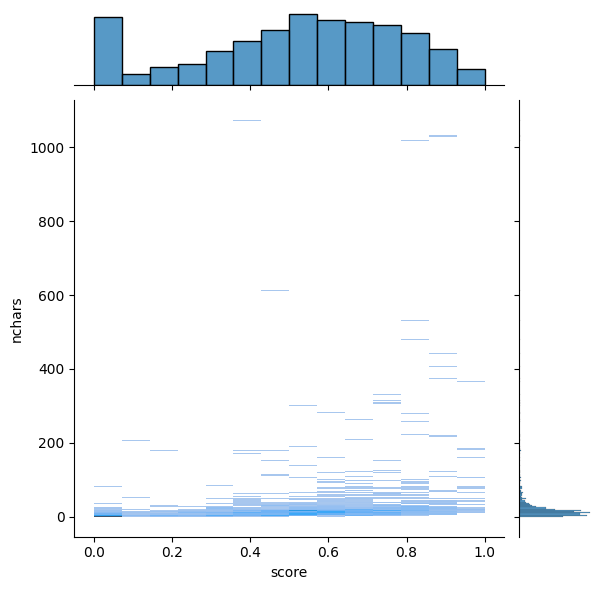

In [4]:
sns.jointplot(data=df.sample(1000), x="score", y="nchars", kind='hist') 

# Distribution of lengths

In [5]:
df.nchars.describe(percentiles=[0.01,0.05,0.25,0.75,0.95,0.99])

count    1.467760e+06
mean     3.248816e+01
std      3.028204e+02
min      0.000000e+00
1%       0.000000e+00
5%       2.000000e+00
25%      8.000000e+00
50%      1.400000e+01
75%      2.600000e+01
95%      9.800000e+01
99%      3.360000e+02
max      1.007100e+05
Name: nchars, dtype: float64

### Only 5% are longer than 98 symbols. 50% are shorter than 14 symbols (see examples of this length below). 1% of examples have length from 336 to 100K symbols. Let's see some examples.
Examples of length 14 (median):

In [7]:
df.query('nchars==14').sample(10)

,score,nchars,nbytes,text,lang,crawl
1235816,0.368,14.0,14.0,Cookie Policy|,mr,samplescoredlines_cc40
681920,0.627,14.0,14.0,Legal Services,hy,samplescoredlines_wide17
567975,0.330,14.0,14.0,volo malaysian,it,samplescoredlines_wide17
755087,0.642,14.0,14.0,Visuell profil,nn,samplescoredlines_cc40
727186,0.364,14.0,15.0,Ležaj 2311 KBS,hbs,samplescoredlines_wide17
923425,0.723,14.0,14.0,Portal Pilihan,ms,samplescoredlines_cc40
121391,0.794,14.0,27.0,Больше отзывов,ru,samplescoredlines_wide17
397124,0.753,14.0,14.0,Advertisements,so,samplescoredlines_wide17
727451,0.383,14.0,14.0,Lizanje [4379],hbs,samplescoredlines_wide17
1414419,0.855,14.0,27.0,Լրատվական կայք,hy,samplescoredlines_cc40


Longer texts, sample from longest 25%:

In [8]:
long = df.query('nchars>26')
# print(len(long))
print('\n\n'.join(long.sample(10).text.values))

Электрондук кайрылууларды кабыл алуу: minfin@minfin.kg, тел. (+ 996 312) 625074

Ver todas las 11 ofertas desde US$172

Можете да креирате етикета.

आज के दौर में मजदूर वर्ग पर हमले तेज हो गए हैं। मेहनतकश आबादी की खबरें भी मुख्य मीडिया से गायब हैं। दरअसल, उस पर पूँजीपति वर्ग का कब्जा है, जो मेहनतकश आवाम का शोषण कर रही है। ऐसे में मजदूरों को अपना वैकल्पिक मीडिया खड़ा करना बेहद जरूरी है। देश में मजदूरों की वैकल्पिक मीडिया खड़ी हुई है या हो रही।

Log in or register to post comments

Beleef sprookjesachtige landschappen

खाकी ने तानी थी खाकी पे रिवाल्वर, दोषी दरोगाओं को सस्पेंड करने के बाद SP ने दोनो पर दर्ज कराया SC-ST का मुकदमा

ਇਕ ਘਰਿ ਹੀ ਬੈਠੇ ਖਾਣ ਕੁਟ ਕੁਟ ਚੂਰੀਆਂ ।

Povinne zverejňované informácie

Først ble han avvist på Karlsberger Pub, etterpå gikk han på Svalbar og sjikanerte betjeningen.


# Zoom in

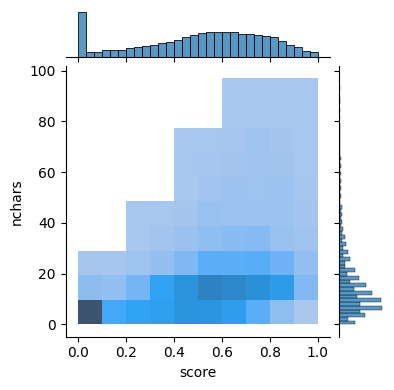

In [20]:
# nchars<98 covers 95% of examples
sns.jointplot(data=df.query('nchars<98').sample(10000), x="score", y="nchars", kind='hist', bins=10, pthresh=0.01, height=4) 

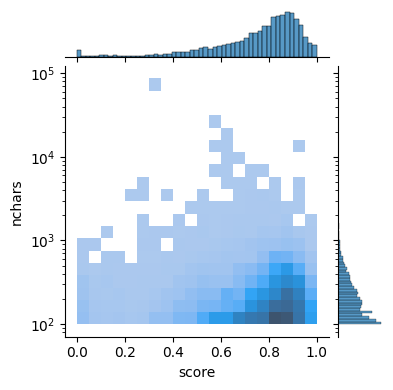

In [56]:
# nchars>98 covers 5% of examples, plot nchars in log scale
sns.jointplot(data=df.query('nchars>98 ').sample(10000), x="score", y="nchars", kind='hist', 
              height=4, bins=20, log_scale=(False,True)) 

In [54]:
df[['nchars','score']].corr('spearman')

,nchars,score
nchars,1.000000,0.544402
score,0.544402,1.000000


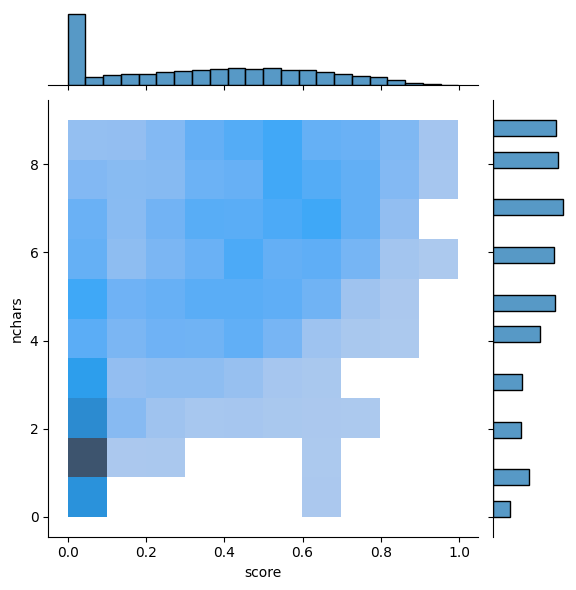

In [60]:
sns.jointplot(data=df.query('nchars<10').sample(10000), x="score", y="nchars", kind='hist', bins=10)

In [62]:
df.query('nchars==0 & score > 0.5').lang.value_counts()

lang
ps    151
hy      6
cy      5
ar      3
ro      2
uz      1
vi      1
si      1
ka      1
el      1
fr      1
en      1
sq      1
Name: count, dtype: int64

The empty string sometimes gets the fluency score of about 0.6  form the LM for a few languages.

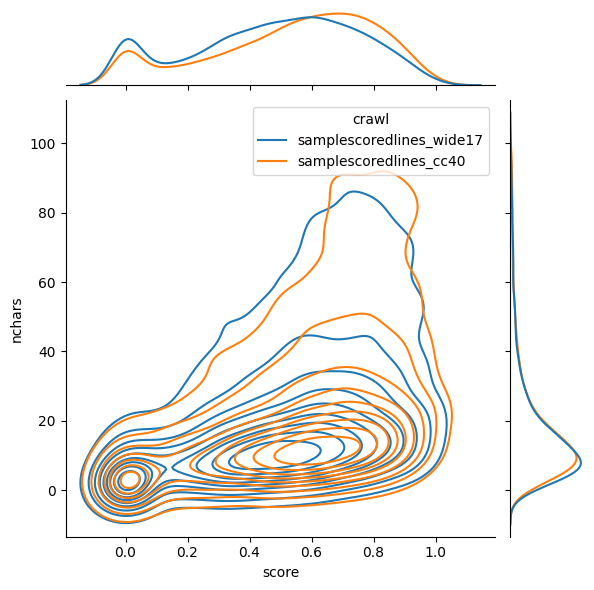

In [171]:
sns.jointplot(data=df.query('nchars<100').sample(10000), x="score", y="nchars", hue='crawl', kind='kde')

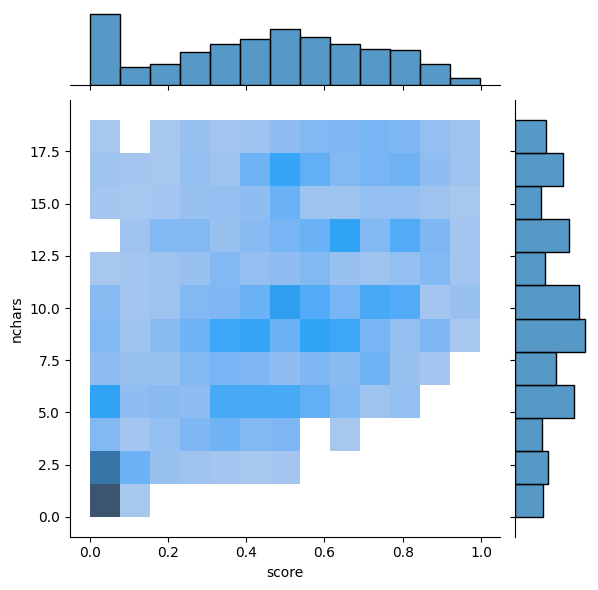

In [128]:
sns.jointplot(data=df.query('nchars<20').sample(1000), x="score", y="nchars", kind='hist')

# Per-language

<Axes: xlabel='score', ylabel='lang'>

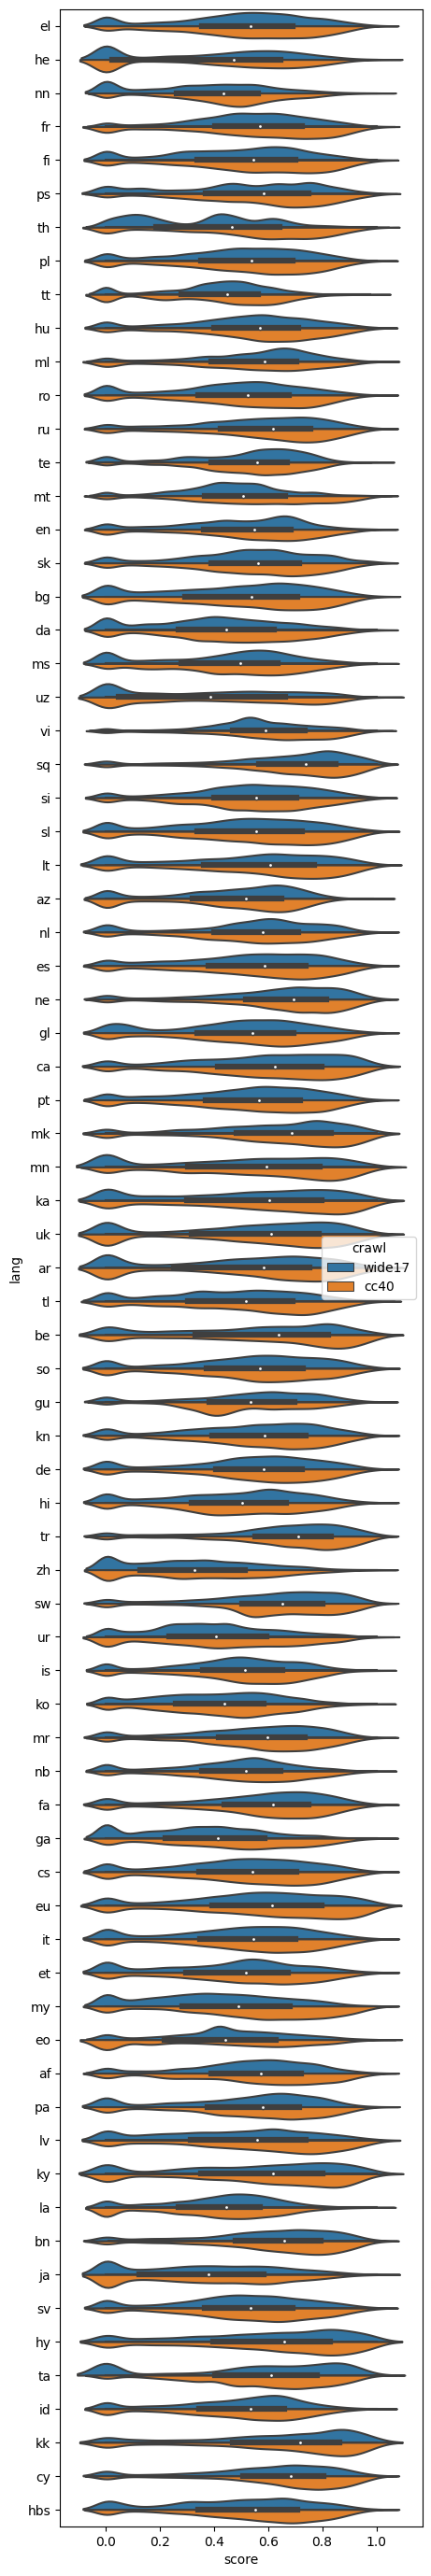

In [257]:
plt.figure(figsize=(5,35))
sns.violinplot(data=df.query('nchars<100'), y="lang", x="score", hue="crawl", split=True)

<Axes: xlabel='nchars', ylabel='lang'>

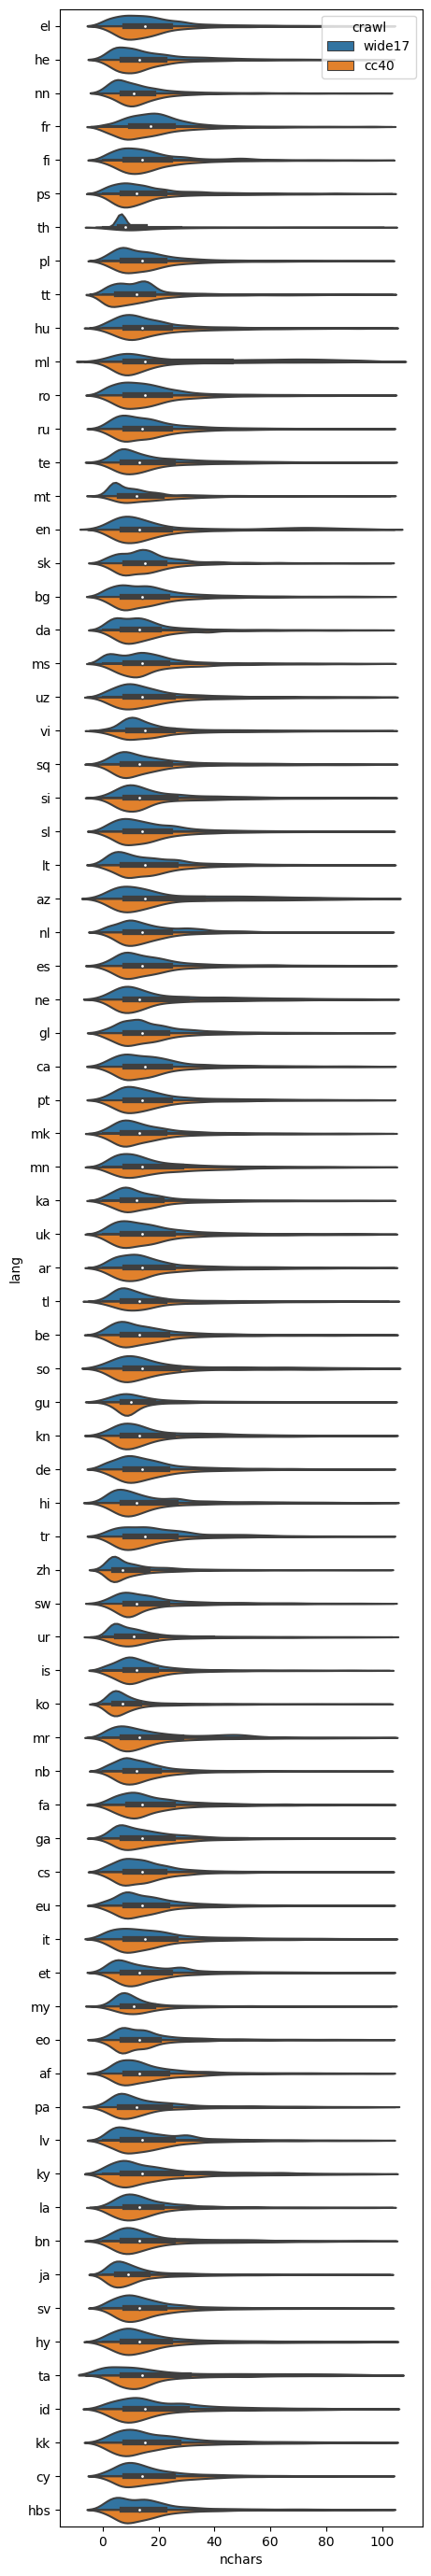

In [258]:
plt.figure(figsize=(5,35))
sns.violinplot(data=df.query('nchars<100'), y="lang", x="nchars", hue="crawl", split=True)

In [300]:
def bivarplot(df, langs):
    sns.displot(data=df[df.lang.isin(langs)].query('nchars<300 & nchars>1'), stat='count',
                    x='score', y='nchars', row="crawl",  col="lang", col_order=langs,
                bins=10, log_scale=(False,True), pthresh=0.01, pmax=0.95, 
                height=2.2, aspect=1.0 )

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


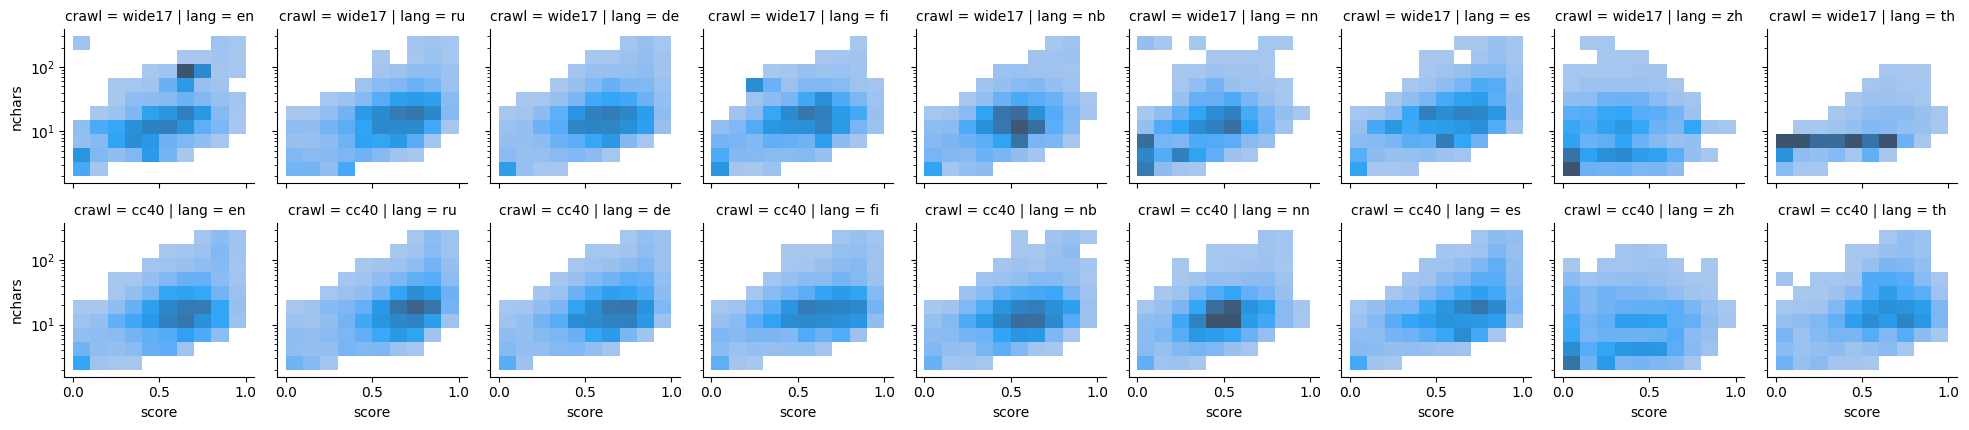

In [302]:
langs1 = 'en,ru,de,fi,nb,nn,es,zh,th'.split(',')
bivarplot(df, langs1)

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


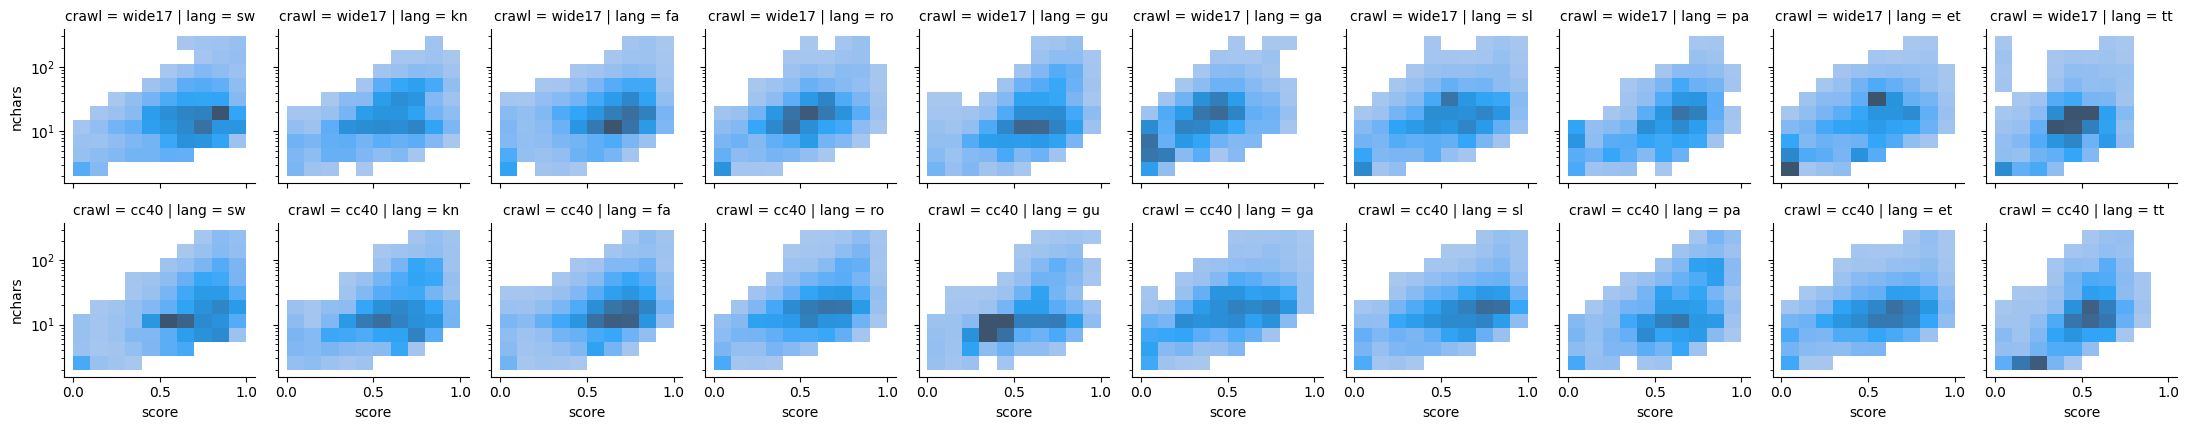

In [310]:
langs2 = list(set(df.lang.unique()) - set(langs1))[:10]
bivarplot(df, langs2)

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


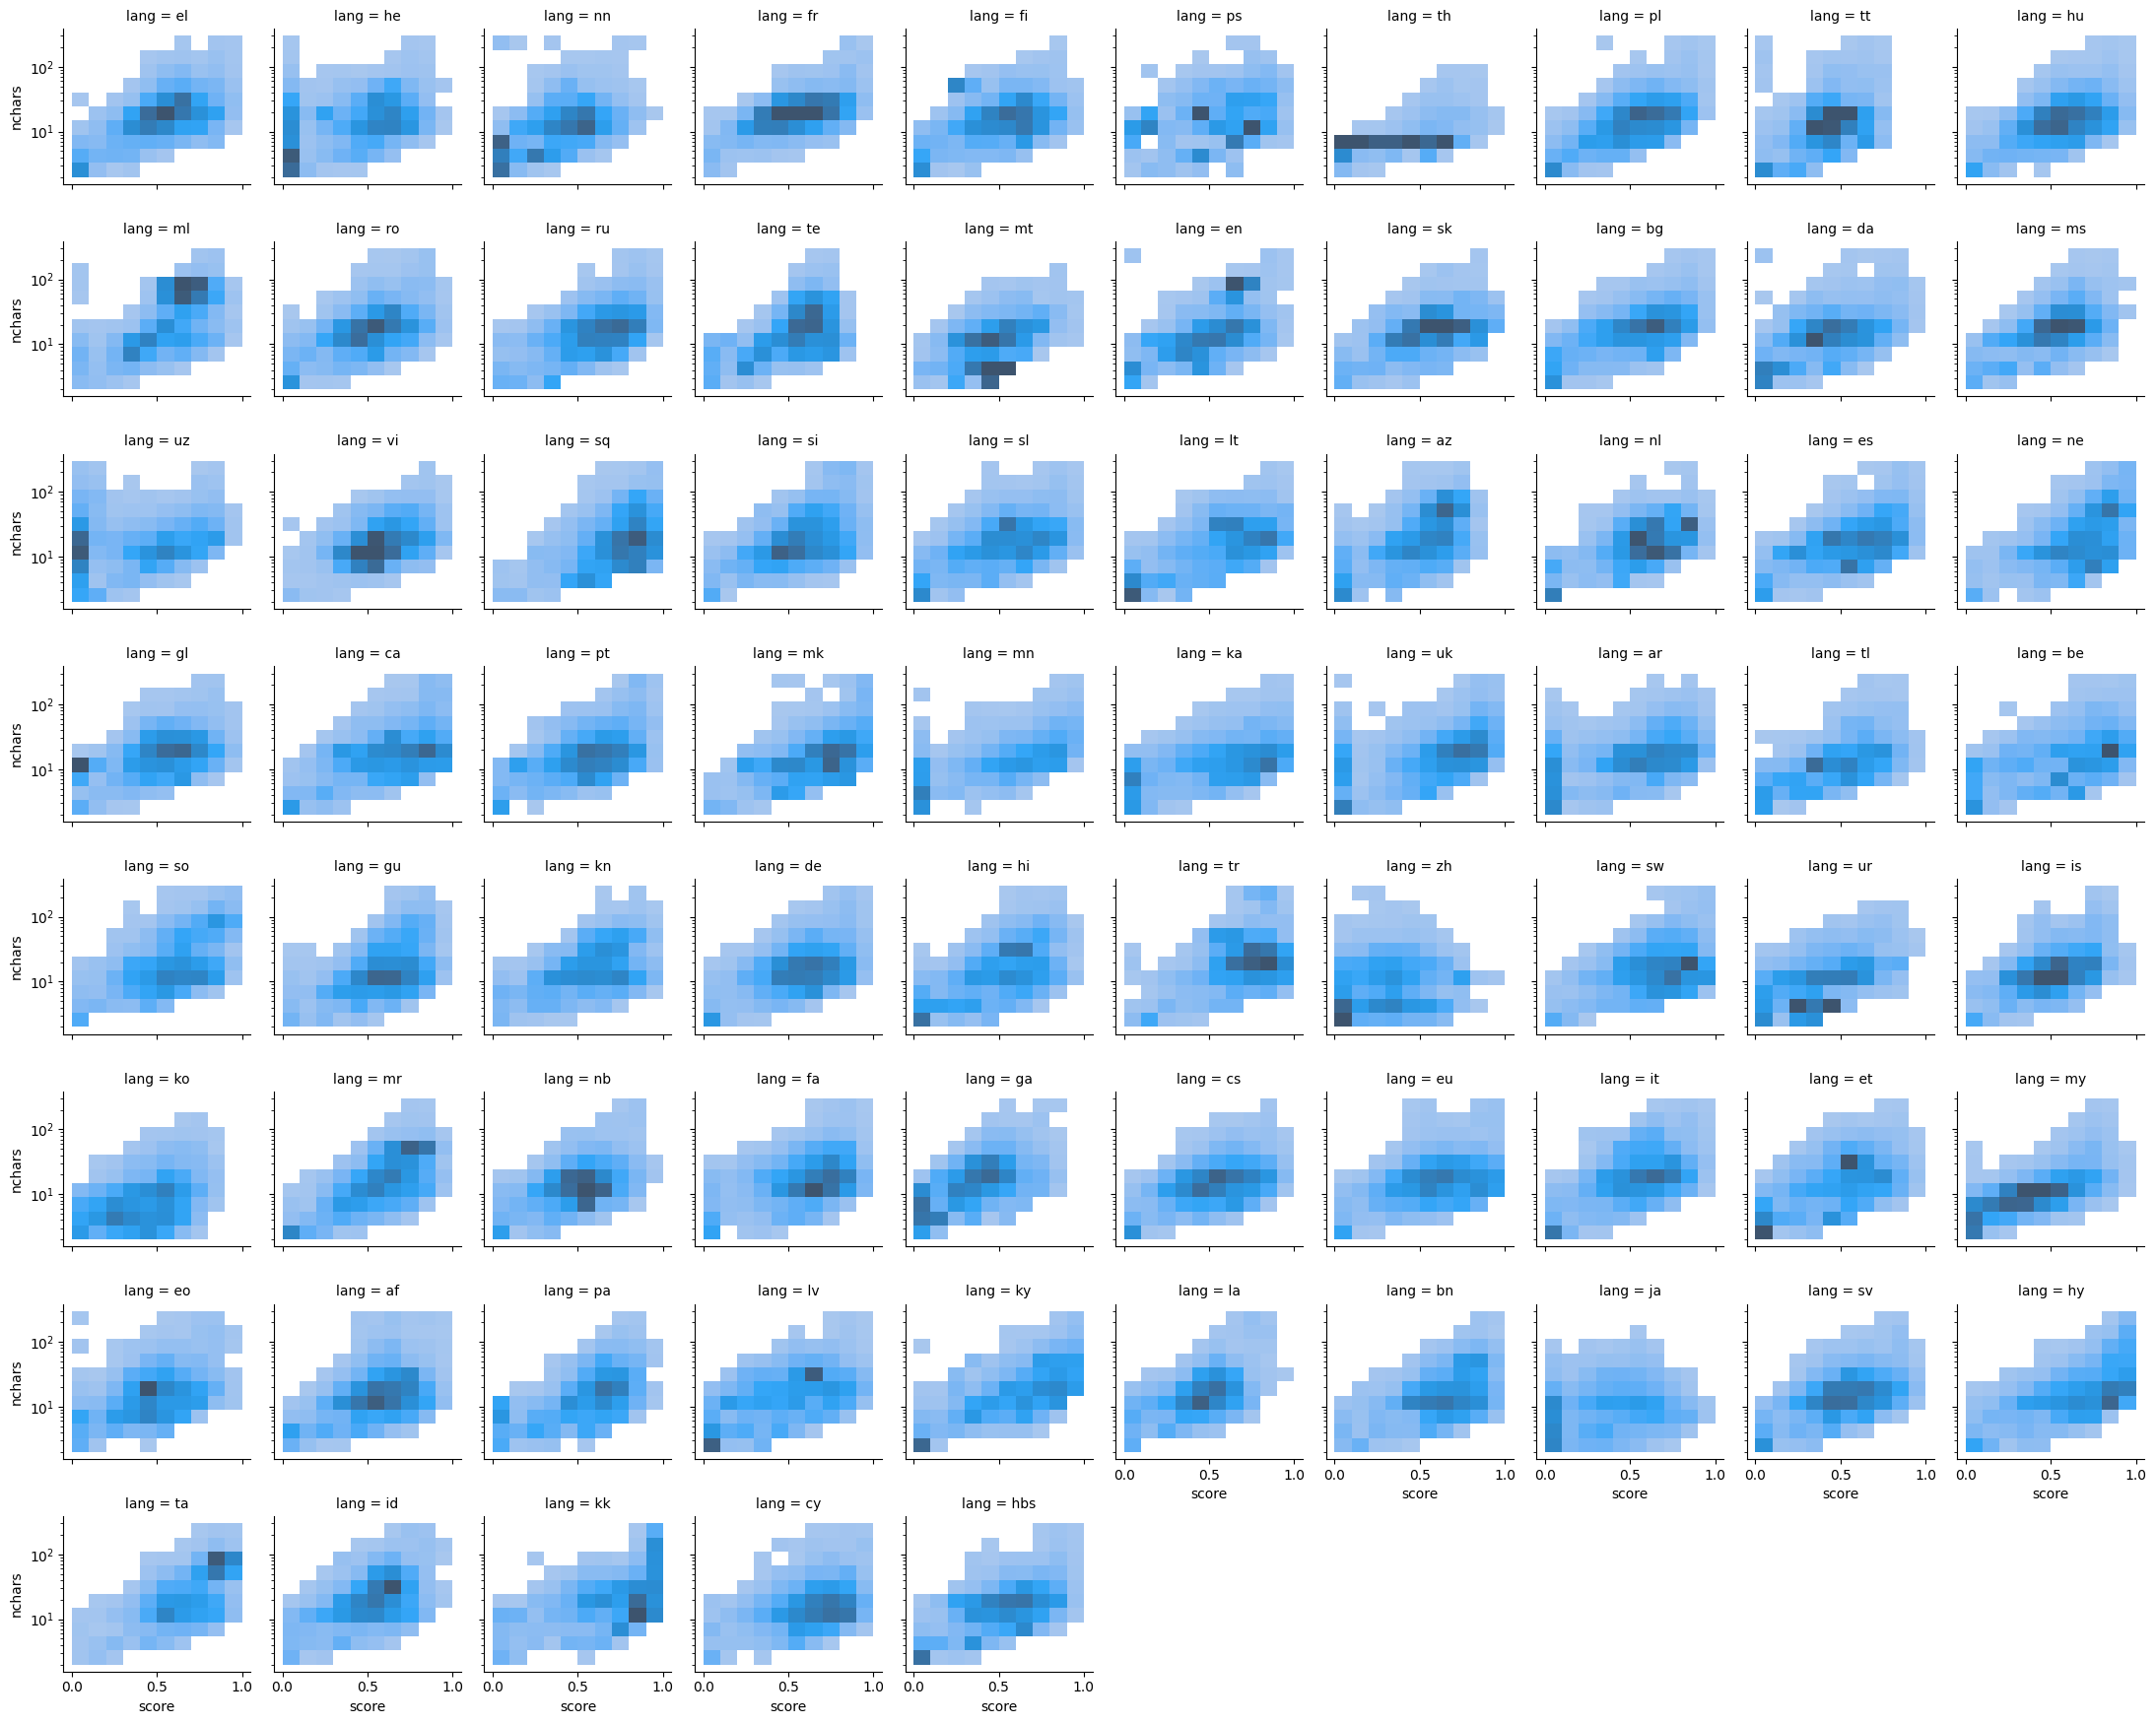

In [312]:
sns.displot(data=df.query('nchars<300 & nchars>1 & crawl=="wide17"'), stat='count',
                x='score', y='nchars',  col="lang", col_wrap=10,
            bins=10, log_scale=(False,True), pthresh=0.01, pmax=0.95, 
            height=2.2, aspect=1.0 )